In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('student.csv')

In [ ]:
categorical_columns = ['Sex', 'High_School_Type', 'Scholarship', 'Additional_Work',
                       'Sports_activity', 'Transportation', 'Attendance',
                       'Reading', 'Notes', 'Listening_in_Class', 'Project_work']



In [ ]:
le = LabelEncoder()
for col in categorical_columns:
    df[col] = le.fit_transform(df[col].astype(str))


In [ ]:
X = df.drop(['Id', 'Grade'], axis=1)
y = df['Grade']

In [ ]:
y = le.fit_transform(y)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
lr_model = LogisticRegression(multi_class='ovr', max_iter=1000)
lr_model.fit(X_train_scaled, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='ovr')

In [ ]:
y_pred = lr_model.predict(X_test_scaled)


In [ ]:
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred,
                            target_names=le.classes_))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

          AA       0.13      0.67      0.22         3
          BA       0.50      0.25      0.33         4
          BB       0.40      0.33      0.36         6
          CB       0.00      0.00      0.00         3
          CC       0.00      0.00      0.00         3
          DC       0.00      0.00      0.00         4
          DD       0.25      0.50      0.33         2
        Fail       1.00      0.25      0.40         4

    accuracy                           0.24        29
   macro avg       0.29      0.25      0.21        29
weighted avg       0.32      0.24      0.22        29



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


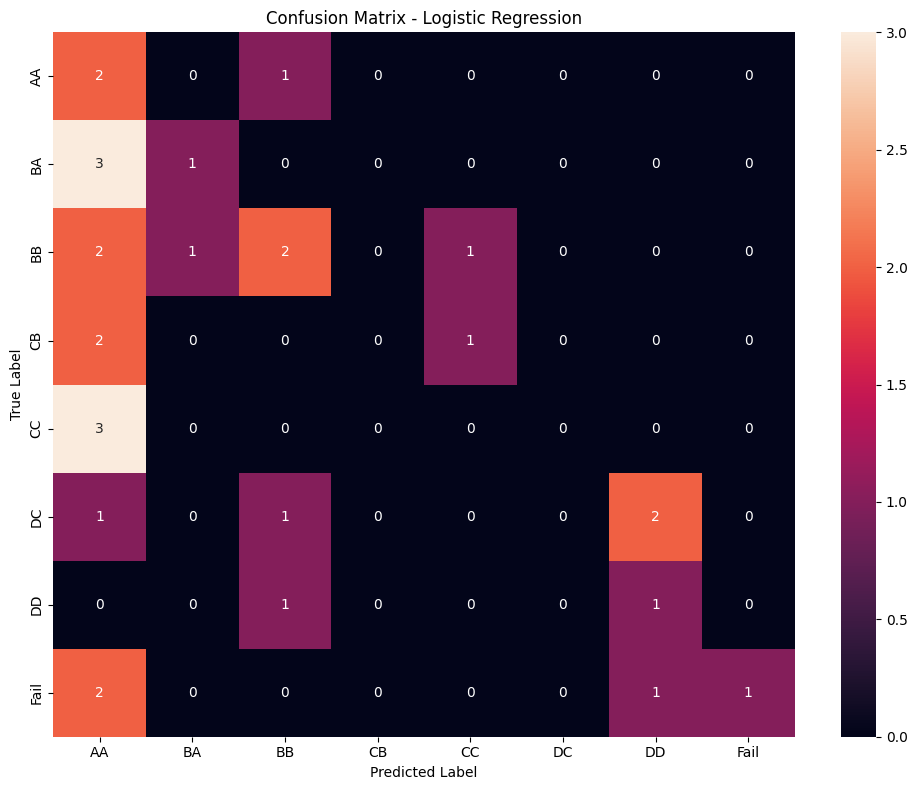

In [ ]:
plt.figure(figsize=(10,8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()


In [ ]:
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': np.abs(lr_model.coef_[0])
})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))


Top 10 Most Important Features:
               feature  importance
0           Unnamed: 0    0.490819
2                  Sex    0.454995
3     High_School_Type    0.349765
4          Scholarship    0.323928
12  Listening_in_Class    0.288091
5      Additional_Work    0.244740
6      Sports_activity    0.196079
10             Reading    0.192255
1          Student_Age    0.084175
8   Weekly_Study_Hours    0.060342
